# Regressionsanalys med interaktionseffekter - kontinuerliga variabler
*av Anders Sundell*

I ett <a href="regression_interaction_sv.html">annat inlägg</a> gick vi igenom regressionsanalys med interaktionseffekter. Variablerna hade där bara två värden. Men hur gör man när en eller båda variablerna i interaktionen är kontinuerliga skalor, med många värden? I princip gör man samma sak, men man får presentera och tolka resultaten på lite annat sätt. Det kommer vi att gå igenom i det här inlägget. För den som vill läsa mer rekommenderas också denna <a href="https://www.jstor.org/stable/25791835?seq=1#page_scan_tab_contents" target=_blank>standardartikel</a> på området.

För att ha något att jobba med kommer vi i det här exemplet att använda oss av data från den amerikanska <a href="http://gss.norc.org/get-the-data/stata">General Social Survey</a>, som är en enkätundersökning med vanliga medborgare, med frågor om allt möjligt. Vi kommer använda versionen från 2016. Ladda ned den och lägg den i projektmappen för att följa med i exemplet. Jag har lagt den i en undermapp som heter data, och anger därför också det när jag öppnar filen.

För att spara plats i inlägget har koden för omkodningar komprimerats, och förklaras inte här. Om du vill läsa mer om vad det är som händer, se det tidigare inlägget.

In [57]:
cd "/Users/xsunde/Dropbox/Jupyter/stathelp"
use "data/GSS2016.dta", clear
recode sex (1=0) (2=1), generate(woman)
recode childs (0=0) (1/8 = 1), generate(dum_kids)


/Users/xsunde/Dropbox/Jupyter/stathelp


(2867 differences between sex and woman)

(1603 differences between childs and dum_kids)


## Interaktionsanalys med kontinuerliga variabler

I det tidigare inlägget såg vi att effekten av att ha barn skiljde sig åt mellan kvinnor och män. Men variabeln för barn vi använde där var en så kallad dummyvariabel, med värdena 0 (inga barn) och 1 (ett eller fler barn). Nu ska vi istället använda en kontinuerlig barnvariabel, __childs__, som visar hur många barn man har i siffror. Variabeln är dock kapad så att värdet 8 indikerar 8 eller fler barn.

Först gör vi en vanlig regressionsanalys, utan interaktion:

In [24]:
reg realrinc woman childs age 


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(3, 1623)      =     24.96
       Model |  6.1202e+10         3  2.0401e+10   Prob > F        =    0.0000
    Residual |  1.3264e+12     1,623   817265487   R-squared       =    0.0441
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28588

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       woman |   -9474.27   1418.312    -6.68   0.000    -12256.19   -6692.354
      childs |  -108.2144   502.1071    -0.22   0.829    -1093.061    876.6319
         age |   282.4416   52.96583     5.33   0.000      178.553    386.3302
       _cons |   16147.79   2435.659     6.63   0.

Koefficienten för __childs__ visar nu den förväntade effekten av att öka variabeln ett steg, dvs ha ett barn till. Den är svagt negativ och inte signifikant. Det verkar alltså inte vara någon större skillnad mellan de som har få och de som har många barn. Nu lägger vi till interaktionen med woman-variabeln. Det gör vi automatiskt genom att skriva in i regressionskommandot att de två variablerna hör ihop. Vi måste dock nu lägga till ett c. framför childs-variabeln, för att visa att det är en continous variabel, en skala.

In [60]:
reg realrinc woman##c.childs age


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(4, 1622)      =     19.93
       Model |  6.5005e+10         4  1.6251e+10   Prob > F        =    0.0000
    Residual |  1.3226e+12     1,622   815424344   R-squared       =    0.0468
-------------+----------------------------------   Adj R-squared   =    0.0445
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28556

--------------------------------------------------------------------------------
      realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
       1.woman |  -6100.754   2108.763    -2.89   0.004    -10236.94   -1964.569
        childs |   855.1288   671.1906     1.27   0.203    -461.3629    2171.621
               |
woman#c.childs |
            1  |  -2060.054   953.8345    -2.16   0.031    -3930.931   -189.1764
    

Som vanligt när man gör interaktioner gäller det att komma ihåg att man inte kan tolka koefficienterna i interaktionen på vanligt sätt. Woman betyder nu "effekten" av att vara kvinna för de som har noll barn. Childs betyder nu effekten av att få ett barn till för de som har 0 variabeln woman, dvs män. Termen c.woman#c.childs är interaktionstermen, och visar alltså effekten av den nya variabeln som är värdet på woman gånger värdet på childs. I praktiken blir det hur koefficienterna förändrar sig när man ändrar på den andra variabeln. 

För att räkna ut effekten av barnafödande för båda värdena av woman tar vi grundkoefficienten för childs, och adderar sedan koefficienten för interaktionstermen, gånger värdet på womanvariabeln. Alltså: <br>
För woman = 0 (män): $855.1288 -2060.054*0 = 855.1288$ <br>
För woman = 1 (kvinnor): $855.1288 -2060.054*1 = -1204.9252$ <br>

Vi ser alltså att män som får ett barn till tjänar lite mer, medan kvinnor tjänar mindre. Skillnaden i effekt mellan grupperna är signifikant, ser vi på signifikansvärdet på interaktionstermen. Men - det betyder inte att effekterna i sig är signifikanta, om vi jämför med noll. Dvs, i gruppen kvinnor, är effekten av barnafödande signifikant negativ? Och i gruppen män, är effekten av barnafödande signifikant positiv? För att räkna ut det använder vi marginskommandot, och kör direkt efter kommandot __marginsplot__ för att illustrera koefficienterna.



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : childs

1._at        : woman           =           0

2._at        : woman           =           1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
childs       |
         _at |
          1  |   855.1288   671.1906     1.27   0.203    -461.3629    2171.621
          2  |  -1204.925   713.7205    -1.69   0.092    -2604.836    194.9863
------------------------------------------------------------------------------


  Variables that uniquely identify margins: woman


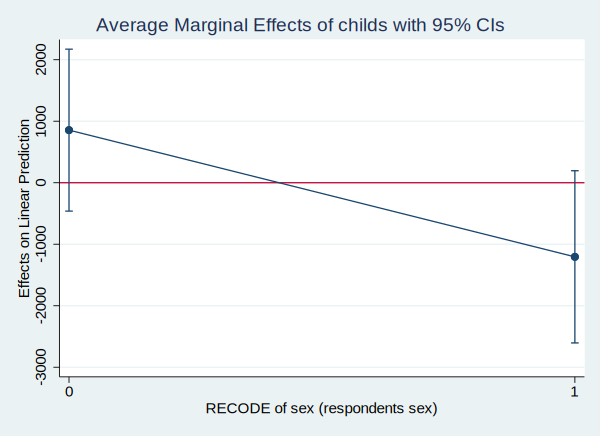

In [61]:
margins, dydx(childs) at(woman=(0 1))
marginsplot, yline(0)

Som vi räknade ut manuellt ser vi att effekten av childs är positiv för de som har noll på variabeln woman, dvs männen, och negativ för kvinnorna. Men effekterna i sig är inte signifikant skilda från noll. Det betyder att vi kan vara rätt säkra på att effekten av barnafödande i populationen (och inte bara i urvalet) är olika för kvinnor och män, men vi kan samtidigt inte vara säkra på att någon av dem är något annat än noll! Det här kan vara lite svårt att greppa.

Men det man behöver tänka är att "inte signifikant skild från noll" inte betyder att den definitivt *är* noll. Det är bara mer än 5% risk att den är noll. Men om man ser på grafen ser vi att konfidensintervallen för de två koefficienterna bara överlappar lite grann. För att de sanna effekterna ska vara desamma måste alltså effekten för män vara i den nedersta delen av intervallet, samtidigt som effekten för kvinnor är i den översta. Sammanlagt blir den sannolikheten mindre än 5%. Klurigt, men rimligt.

Nu ska vi räknar ut vad skillnaden mellan män och kvinnor är, för olika värden av variabeln childs. Det gör vi på genom att ta grundkoefficienten för woman, och sedan addera interaktionstermen gånger olika värden av barn.

0 barn: -6100.754 -2060.054 * 0 = -6100.754 <br>
1 barn: -6100.754 -2060.054 * 1 = -8160.808 <br>
2 barn: -6100.754 -2060.054 * 2 = -10220.862 <br>
3 barn: -6100.754 -2060.054 * 3 = -12280.916 <br>
4 barn: -6100.754 -2060.054 * 4 = -14340.97 <br>
5 barn: -6100.754 -2060.054 * 5 = -16401.024 <br>
6 barn: -6100.754 -2060.054 * 6 = -18461.078 <br>
7 barn: -6100.754 -2060.054 * 7 = -20521.132 <br>
8 barn: -6100.754 -2060.054 * 8 = -22581.186 <br>

Det blir alltså åtta olika koefficienter, och varje blir 2060.054 mindre än den föregående. Nu kan man inte ha 3.5 barn, men det går lika bra att göra interaktioner även med variabler som har decimalvärden. Då är det bara att sätta in dem i multiplikationen.

Nu tar vi fram koefficienterna med marginskommandot för att också få ut signifikansnivåer och konfidensintervall:



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : 1.woman

1._at        : childs          =           0

2._at        : childs          =           1

3._at        : childs          =           2

4._at        : childs          =           3

5._at        : childs          =           4

6._at        : childs          =           5

7._at        : childs          =           6

8._at        : childs          =           7

9._at        : childs          =           8

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
0.woman      |  (base outcome)
-------------+----------------------------------------------------------------
1.woman      |
         _at |
 

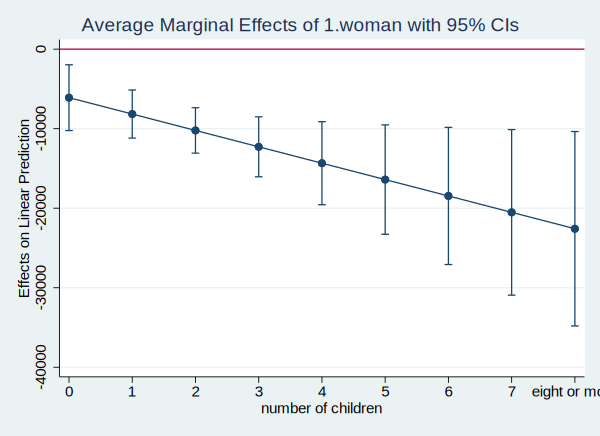

In [62]:
margins, dydx(woman) at(childs=(0/8))
marginsplot, yline(0)

De åtta punkterna med konfidensintervall visar alltså de åtta koefficienterna vi nyss räknade ut. Vi ser att koefficienten för woman - alltså skillnaden mellan kvinnor och män - blir större och större ju fler barn man har. Alla konfidensintervall är också skilda från noll, vilket betyder att effekten är signifikant överallt.

Att konfidensintervallen varierar har att göra med var observationerna befinner sig. Regressionslinjen kommer dras genom observationernas tyngdpunkt, och varierar mer i ändarna kring den. Därför är intervallen som smalast där det finns flest observationer - mellan 1 och 3 barn. Medelvärdet i datan är 1,8 barn.

Slutligen tar vi fram predicerade värden, med hjälp av marginskommandot. Det enklaste sättet är då att visa förväntad inkomst för kvinnor och män, vid olika antal barn. Tänk här på att det spelar roll i vilken ordning man skriver variablerna inom at-option. Variabeln som står först kommer hamna på x-axeln, och den andra styr linjernas färger. Tabellen blir också rätt stor, eftersom vi nu ber om 18 (9 * 2) olika koefficienter.



Predictive margins                              Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : woman           =           0
               childs          =           0

2._at        : woman           =           0
               childs          =           1

3._at        : woman           =           0
               childs          =           2

4._at        : woman           =           0
               childs          =           3

5._at        : woman           =           0
               childs          =           4

6._at        : woman           =           0
               childs          =           5

7._at        : woman           =           0
               childs          =           6

8._at        : woman           =           0
               childs          =           7

9._at        : woman           =           0
               childs          =           8

10._at       : woman           =   

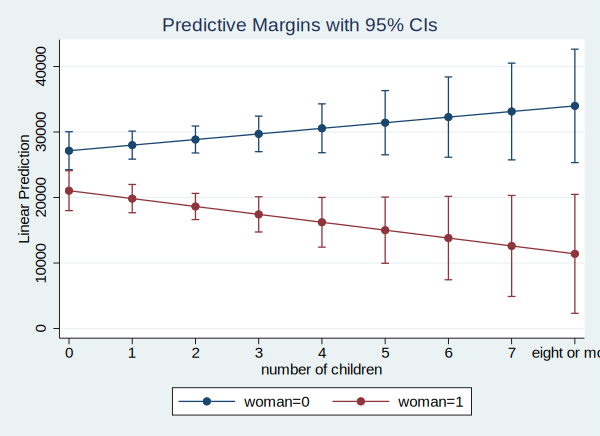

In [41]:
margins, at(childs=(0/8) woman=(0 1))
marginsplot

## Interaktion med två kontinuerliga variabler

Nu är det dags att komplicera det hela ytterligare. Hur blir det om vi har två variabler som båda är skalor med många värden? I grund och botten gör vi exakt samma sak som vi gjort i de två tidigare fallen. Vi får bara tänka på att tolka det hela rätt.

Säg att vi nu vill titta på sambandet mellan barnafödande och ålder, istället för kön. Det blir lite mystiskt i och med att hur många barn man har är så starkt förknippat med ålder, men vi prövar, för exemplets skull. Vi kör en regression där vi interagerar antal barn med ålder (och skriver c. framför båda variablerna, eftersom de är skalor):

In [63]:
reg realrinc woman c.childs##c.age


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(4, 1622)      =     23.32
       Model |  7.5451e+10         4  1.8863e+10   Prob > F        =    0.0000
    Residual |  1.3122e+12     1,622   808984506   R-squared       =    0.0544
-------------+----------------------------------   Adj R-squared   =    0.0520
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28443

--------------------------------------------------------------------------------
      realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
         woman |  -10027.18   1417.245    -7.08   0.000       -12807   -7247.353
        childs |   6347.314   1617.275     3.92   0.000     3175.145    9519.482
           age |   474.4715   69.78933     6.80   0.000     337.5848    611.3583
               |
c.childs#c.age |  -13

Faktum är alltså att det finns en interaktionseffekt. Eftersom interaktionstermen är negativ blir effekten av barnafödande mer negativ ju äldre man blir, och motsvarande blir effekten av ålder mer negativ ju fler barn man har.

För att till exempel få fram effekten av att få ett barn till vid olika åldrar räknar vi på följande sätt:
20 år gammal: 6347.314 - 138.2845 * 20 = 3581.624 <br>
30 år gammal: 6347.314 - 138.2845 * 30 = 2198.779 <br>
40 år gammal: 6347.314 - 138.2845 * 40 = 815.934 <br>
50 år gammal: 6347.314 - 138.2845 * 50 = -566.9108 <br>
60 år gammal: 6347.314 - 138.2845 * 60 = -1949.756 <br>

Det kan som vanligt illustreras med margins och marginsplot:



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : childs

1._at        : age             =          20

2._at        : age             =          30

3._at        : age             =          40

4._at        : age             =          50

5._at        : age             =          60

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
childs       |
         _at |
          1  |   3581.624   1011.207     3.54   0.000     1598.214    5565.033
          2  |   2198.779   742.7817     2.96   0.003     741.8664    3655.691
          3  |   815.9341   545.9354     1.49   0.135    -254.8787    1886.747
          4  |  -566.9108   511.3732    -1.11   0.268    -1

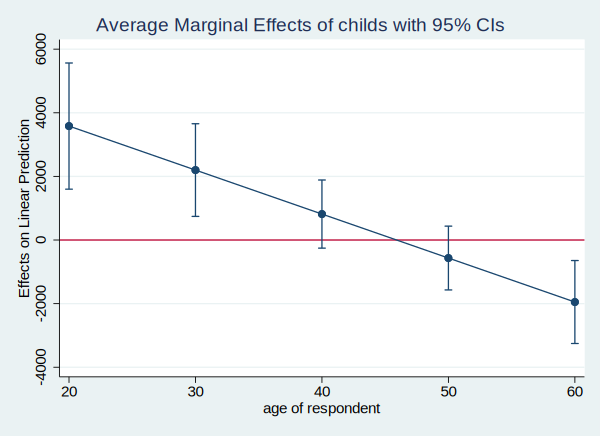

In [64]:
margins, dydx(childs) at(age=(20(10)60))
marginsplot, yline(0)

Och för att få fram effekten av att bli ett år äldre vid olika antal barn räknar vi:

0 barn: 474.4715 - 138.2845 * 0 = 474.4715 <br>
2 barn: 474.4715 - 138.2845 * 2 = 197.9026 <br>
4 barn: 474.4715 - 138.2845 * 4 = -78.6664 <br>
6 barn: 474.4715 - 138.2845 * 6 = -355.2354 <br>
8 barn: 474.4715 - 138.2845 * 8 = 631.8044 <br>



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : age

1._at        : childs          =           0

2._at        : childs          =           2

3._at        : childs          =           4

4._at        : childs          =           6

5._at        : childs          =           8

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
age          |
         _at |
          1  |   474.4715   69.78933     6.80   0.000     337.5848    611.3583
          2  |   197.9026   56.41555     3.51   0.000     87.24755    308.5576
          3  |  -78.66641   100.8976    -0.78   0.436    -276.5697    119.2369
          4  |  -355.2354    160.821    -2.21   0.027    -670.

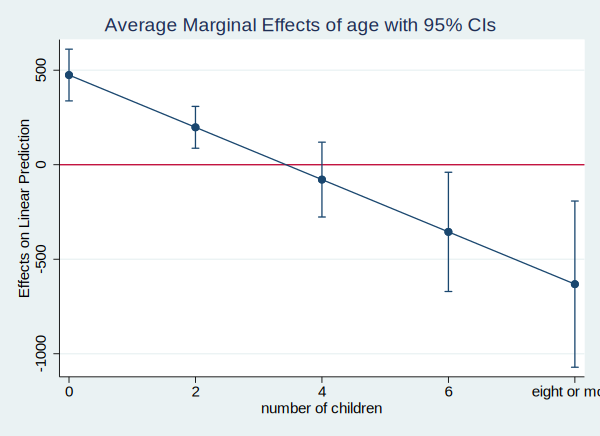

In [54]:
margins, dydx(age) at(childs=(0(2)8))
marginsplot, yline(0)

Klurigast blir det om vi ska räkna ut predicerade värden. Låt oss säga att vi vill ha ålder på x-axeln. Då får vi en linje för varje antal barn. Men för att det inte ska bli för plottrigt ritar vi bara ut några valda värden, till exempel 0, 3 och 6 barn. De andra linjerna dras ju emellan.



Predictive margins                              Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : childs          =           0
               age             =          20

2._at        : childs          =           0
               age             =          30

3._at        : childs          =           0
               age             =          40

4._at        : childs          =           0
               age             =          50

5._at        : childs          =           0
               age             =          60

6._at        : childs          =           0
               age             =          70

7._at        : childs          =           3
               age             =          20

8._at        : childs          =           3
               age             =          30

9._at        : childs          =           3
               age             =          40

10._at       : childs          =   

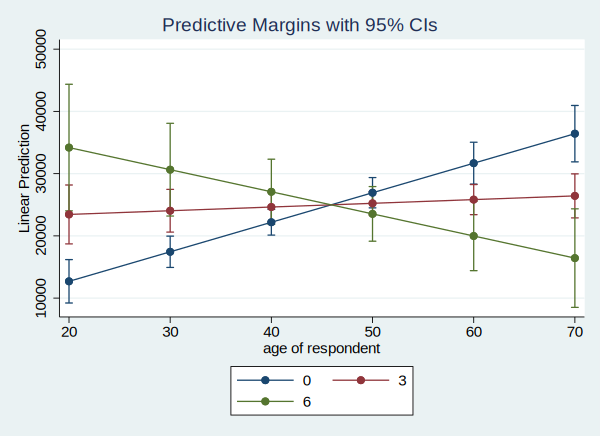

In [65]:
margins, at(age=(20(10)70) childs=(0 3 6))
marginsplot

Här ser vi alltså att de som har 0 barn förväntas tjäna mer och mer ju äldre de blir. Och de som har tre barn tjänar lika mycket hela tiden. Medan de som har 6 barn tjänar mindre och mindre.

Sen får man tänka på att vi nu har delat in datan i ganska många undergrupper, och vi hade bara ca 1600 observationer att jobba med. Ju fler interaktioner man gör, desto känsligare blir datan för outliers, observationer med extrema värden. Om det till exempel är någon person som är väldigt gammal eller har väldigt många barn kommer den få stor betydelse för hur linjerna dras. Ofta är det därför bättre att slå ihop värden så att man till exempel jämför de med och utan barn, eller de över och under 40 år, osv.

## Avslutning

Interaktionsanalyser är ofta teoretiskt motiverade, och kan visa på intressanta skillnader i datan. Men tänk på att målsättningen vanligtvis inte är att bygga en karta i skala 1:1 av verkligheten, utan att koka ner stora mängder data till något enkelt och begripligt. Bara för att det går att hitta en signifikant interaktion betyder inte det att den är intressant, eftersom det alltid finns en risk för "overfitting", att man bygger en modell som passar perfekt till just det urval vi jobbar med för stunden.